Dimensions: (30641, 15)
Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64
        NrSiblings  MathScore  ReadingScore  WritingScore
Gender                                                   
female    0.000470  -0.160481       0.24033      0.292712
male     -0.000476   0.162351      -0.24313     -0.296122


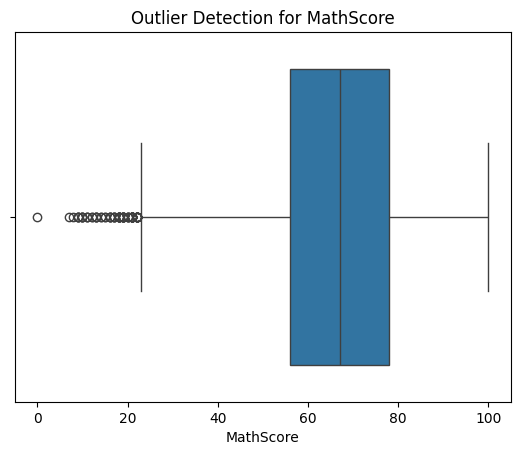

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Expanded_data_with_more_features.csv', engine='python')


print(f"Dimensions: {df.shape}")


print(df.isnull().sum())
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop_duplicates(inplace=True)

sns.boxplot(x=df['MathScore'])
plt.title("Outlier Detection for MathScore")
plt.savefig('math_score_boxplot.png')

Q1 = df['MathScore'].quantile(0.25)
Q3 = df['MathScore'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['MathScore'] < (Q1 - 1.5 * IQR)) | (df['MathScore'] > (Q3 + 1.5 * IQR)))]


for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip().str.lower()


num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_cols = ['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings']
cat_cols = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 8: Arrange data logically (Sorted by Reading Score)
df.sort_values(by='ReadingScore', ascending=False, inplace=True)

# Step 9: Grouping data for visualization arrangement
grouped_data = df.groupby('Gender').mean(numeric_only=True)
print(grouped_data)

# Save the refined dataset for Part 4
df.to_csv('Cleaned_Expanded_Data.csv', index=False)


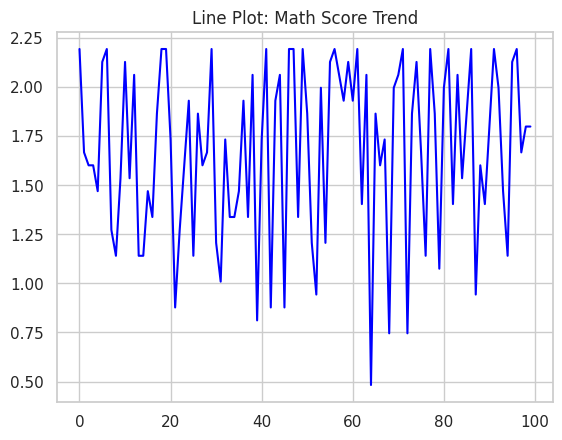

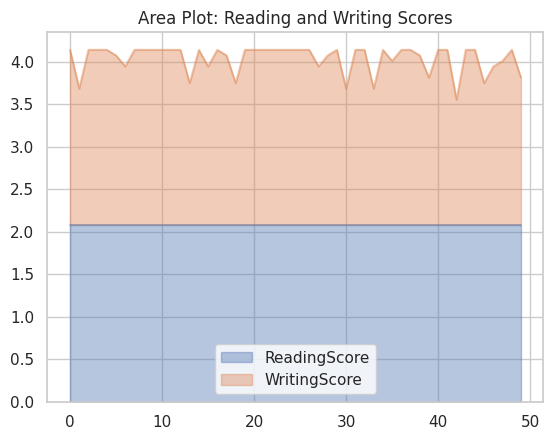

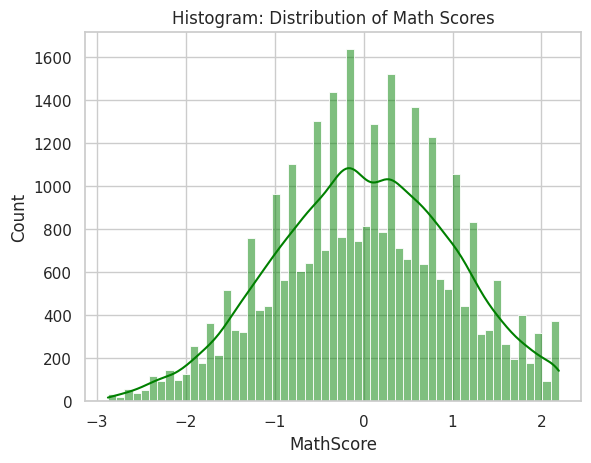

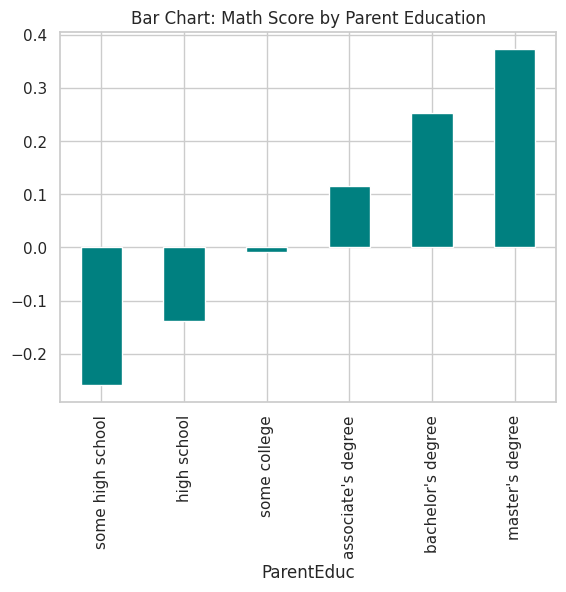

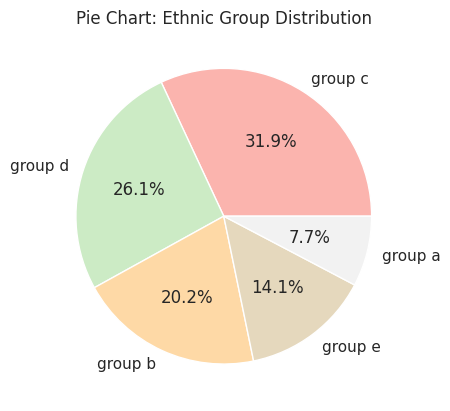

/tmp/ipython-input-424667503.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='WritingScore', data=df, palette='Set2')


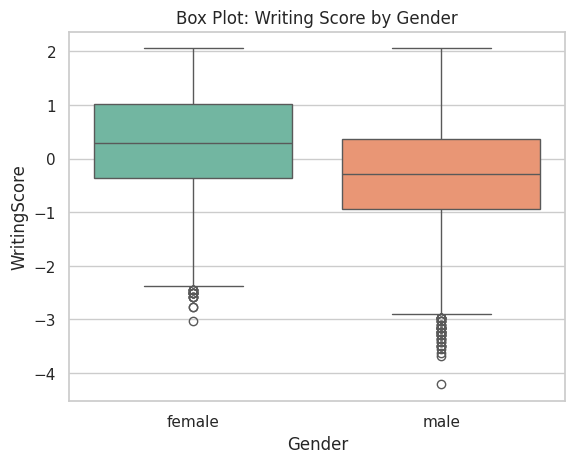

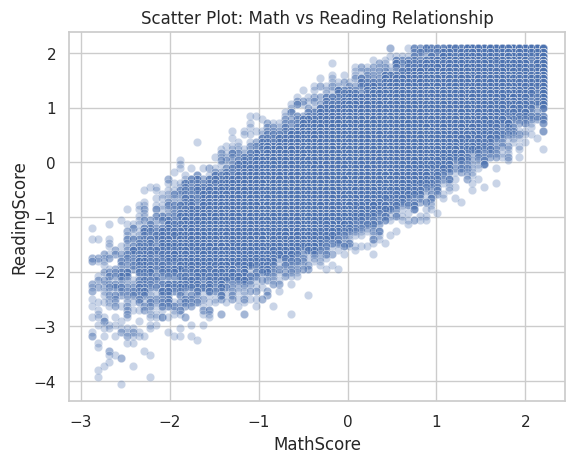

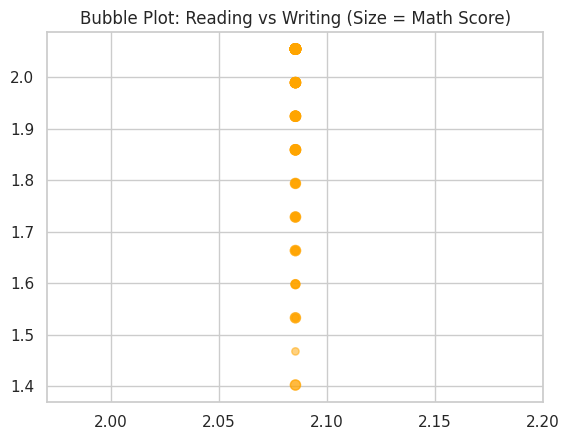

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned data
df = pd.read_csv('Cleaned_Expanded_Data.csv')
sns.set_theme(style="whitegrid")

# 1. Line Plot: Math Score Trends (First 100 students)
plt.plot(df['MathScore'].iloc[:100], color='blue')
plt.title('Line Plot: Math Score Trend')
plt.savefig('visual_1_line.png')
plt.show()
plt.close()

# 2. Area Plot: Reading vs Writing Scores (First 50 students)
df[['ReadingScore', 'WritingScore']].iloc[:50].plot.area(alpha=0.4)
plt.title('Area Plot: Reading and Writing Scores')
plt.savefig('visual_2_area.png')
plt.show()
plt.close()

# 3. Histogram: Math Score Distribution
sns.histplot(df['MathScore'], kde=True, color='green')
plt.title('Histogram: Distribution of Math Scores')
plt.savefig('visual_3_histogram.png')
plt.show()
plt.close()

# 4. Bar Chart: Average Math Score by Parent Education (Sorted)
bar_data = df.groupby('ParentEduc')['MathScore'].mean().sort_values()
bar_data.plot(kind='bar', color='teal')
plt.title('Bar Chart: Math Score by Parent Education')
plt.savefig('visual_4_bar.png')
plt.show()
plt.close()

# 5. Pie Chart: Ethnic Group Distribution
df['EthnicGroup'].value_counts().plot.pie(autopct='%1.1f%%', cmap='Pastel1')
plt.title('Pie Chart: Ethnic Group Distribution')
plt.ylabel('')
plt.savefig('visual_5_pie.png')
plt.show()
plt.close()

# 6. Box Plot: Writing Score by Gender (Detecting outliers)
sns.boxplot(x='Gender', y='WritingScore', data=df, palette='Set2')
plt.title('Box Plot: Writing Score by Gender')
plt.savefig('visual_6_box.png')
plt.show()
plt.close()

# 7. Scatter Plot: Math vs Reading Correlation
sns.scatterplot(x='MathScore', y='ReadingScore', data=df, alpha=0.3)
plt.title('Scatter Plot: Math vs Reading Relationship')
plt.savefig('visual_7_scatter.png')
plt.show()
plt.close()

# 8. Bubble Plot: Reading vs Writing (Size indicates Math Score)
subset = df.iloc[:200]
size = (subset['MathScore'] - subset['MathScore'].min() + 1) * 20
plt.scatter(subset['ReadingScore'], subset['WritingScore'], s=size, alpha=0.5, c='orange')
plt.title('Bubble Plot: Reading vs Writing (Size = Math Score)')
plt.savefig('visual_8_bubble.png')
plt.show()
plt.close()

Regression Results:
                Model   Mean AE   Mean SE  Median AE  r2_score
0  Linear Regression  0.285741  0.127798   0.238805  0.868908
1   Ridge Regression  0.285742  0.127798   0.238854  0.868908

Classification Results:
                  Model  Accuracy  Precision    Recall       ROC
0  Logistic Regression  0.748782   0.688015  0.532646  0.796922
1        Random Forest  0.712422   0.660267  0.388316  0.742168

Scaling/Normalization Effect (Logistic Regression):
     Scaling  Accuracy
0  standard  0.748782
1    minmax  0.748956
2      none  0.748782


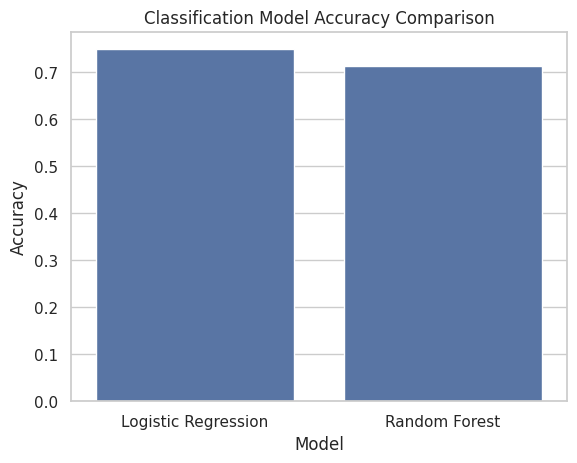

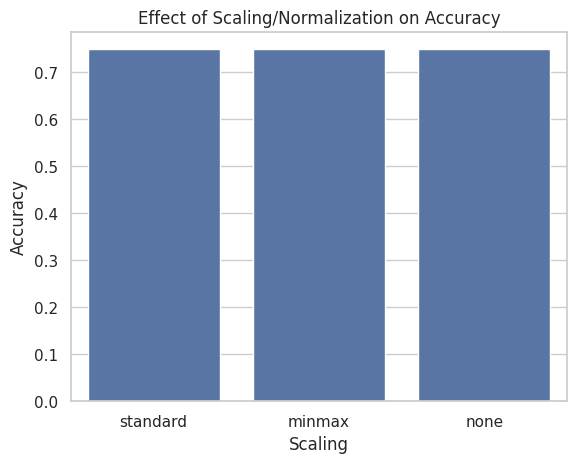

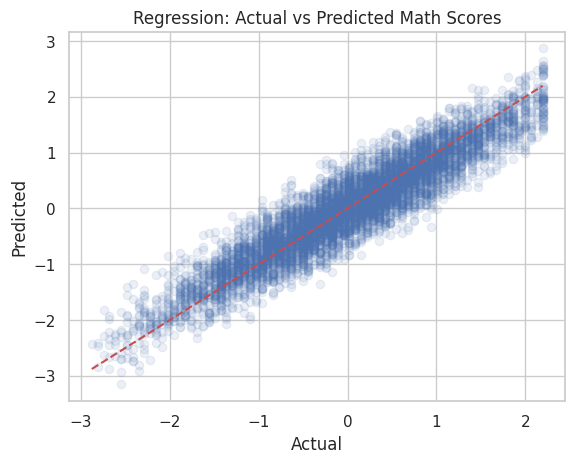

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (mean_absolute_error, mean_squared_error, median_absolute_error, r2_score,
                             accuracy_score, precision_score, recall_score, roc_auc_score)

# Load the cleaned dataset
df = pd.read_csv('Cleaned_Expanded_Data.csv')

# Preprocessing helper
def get_preprocessor(X, scaling='standard'):
    num_features = X.select_dtypes(include=[np.number]).columns.tolist()
    cat_features = X.select_dtypes(include=['object']).columns.tolist()

    if scaling == 'standard':
        num_transformer = StandardScaler()
    elif scaling == 'minmax':
        num_transformer = MinMaxScaler()
    else:
        num_transformer = 'passthrough'

    return ColumnTransformer([
        ('num', num_transformer, num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

# 1. Regression Task: Target = MathScore
X_reg = df.drop(columns=['MathScore'])
y_reg = df['MathScore']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 2. Classification Task: Target = TestPrep
# Filter df to ensure 'TestPrep' is strictly binary for this classification task
df_clf_binary = df[df['TestPrep'].isin(['completed', 'none'])].copy()
X_clf = df_clf_binary.drop(columns=['TestPrep'])
y_clf = df_clf_binary['TestPrep']
le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf) # completed vs none (now guaranteed binary)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf_encoded, test_size=0.2, random_state=42)

# Model Storage
reg_results = []
clf_results = []

# --- Step 3, 4, 5: Model Selection and Training ---

# Regression Models (at least 2 for regression + at least 2 for classification = 4)
# Model 1: Linear Regression
pipe_lr = Pipeline([('prep', get_preprocessor(X_reg)), ('model', LinearRegression())])
pipe_lr.fit(X_train_reg, y_train_reg)
y_pred_lr = pipe_lr.predict(X_test_reg)
reg_results.append({
    'Model': 'Linear Regression',
    'Mean AE': mean_absolute_error(y_test_reg, y_pred_lr),
    'Mean SE': mean_squared_error(y_test_reg, y_pred_lr),
    'Median AE': median_absolute_error(y_test_reg, y_pred_lr),
    'r2_score': r2_score(y_test_reg, y_pred_lr)
})

# Model 2: Ridge Regression (Regularization)
pipe_ridge = Pipeline([('prep', get_preprocessor(X_reg)), ('model', Ridge(alpha=1.0))])
pipe_ridge.fit(X_train_reg, y_train_reg)
y_pred_ridge = pipe_ridge.predict(X_test_reg)
reg_results.append({
    'Model': 'Ridge Regression',
    'Mean AE': mean_absolute_error(y_test_reg, y_pred_ridge),
    'Mean SE': mean_squared_error(y_test_reg, y_pred_ridge),
    'Median AE': median_absolute_error(y_test_reg, y_pred_ridge),
    'r2_score': r2_score(y_test_reg, y_pred_ridge)
})

# Classification Models
# Model 3: Logistic Regression
pipe_log = Pipeline([('prep', get_preprocessor(X_clf)), ('model', LogisticRegression(max_iter=1000))])
pipe_log.fit(X_train_clf, y_train_clf)
y_pred_log = pipe_log.predict(X_test_clf)
y_prob_log = pipe_log.predict_proba(X_test_clf)[:, 1]
clf_results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test_clf, y_pred_log),
    'Precision': precision_score(y_test_clf, y_pred_log, pos_label=0),
    'Recall': recall_score(y_test_clf, y_pred_log, pos_label=0),
    'ROC': roc_auc_score(y_test_clf, y_prob_log)
})

# Model 4: Random Forest Classifier
pipe_rf = Pipeline([('prep', get_preprocessor(X_clf)), ('model', RandomForestClassifier(n_estimators=100, random_state=42))])
pipe_rf.fit(X_train_clf, y_train_clf)
y_pred_rf = pipe_rf.predict(X_test_clf)
y_prob_rf = pipe_rf.predict_proba(X_test_clf)[:, 1]
clf_results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test_clf, y_pred_rf),
    'Precision': precision_score(y_test_clf, y_pred_rf, pos_label=0),
    'Recall': recall_score(y_test_clf, y_pred_rf, pos_label=0),
    'ROC': roc_auc_score(y_test_clf, y_prob_rf)
})

# --- Step 6 & 7: Scaling and Normalization Effect ---
scaling_checks = []
for s_type in ['standard', 'minmax', 'none']:
    pipe = Pipeline([('prep', get_preprocessor(X_clf, scaling=s_type)), ('model', LogisticRegression(max_iter=1000))])
    pipe.fit(X_train_clf, y_train_clf)
    acc = accuracy_score(y_test_clf, pipe.predict(X_test_clf))
    scaling_checks.append({'Scaling': s_type, 'Accuracy': acc})

# --- Output Tables ---
reg_df = pd.DataFrame(reg_results)
clf_df = pd.DataFrame(clf_results)
scaling_df = pd.DataFrame(scaling_checks)

print("Regression Results:\n", reg_df)
print("\nClassification Results:\n", clf_df)
print("\nScaling/Normalization Effect (Logistic Regression):\n", scaling_df)

# --- Step 9: Visualize results ---
plt.clf()
sns.barplot(x='Model', y='Accuracy', data=clf_df)
plt.title('Classification Model Accuracy Comparison')
plt.savefig('clf_comparison.png')
plt.show()

plt.clf()
sns.barplot(x='Scaling', y='Accuracy', data=scaling_df)
plt.title('Effect of Scaling/Normalization on Accuracy')
plt.savefig('scaling_comparison.png')
plt.show()

plt.clf()
plt.scatter(y_test_reg, y_pred_lr, alpha=0.1)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.title('Regression: Actual vs Predicted Math Scores')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig('reg_actual_vs_pred.png')
plt.show()

reg_df.to_csv('Regression_Metrics.csv', index=False)
clf_df.to_csv('Classification_Metrics.csv', index=False)
scaling_df.to_csv('Scaling_Effect.csv', index=False)